# 신경망학습
## 1. 데이터에서 학습하기!
신경망의 특징: 데이터를 보고 학습할 수 있다. 즉 가중치 매개변수의 값을 데이터를 보고 자동으로 결정할 수 있다는 뜻이다.
### 데이터 주도 학습
- 기계학습
  - 데이터에서 답을 찾고 데이터에서 패턴을 발견하고 데이터로 이야기를 만든다.
- 학습 과정
  - 이미지에서 특징(벡터)을 추출하고 그 특징의 패턴을 기계학습 기술(지도학습 방식의 대표 분류 기법인 SVN, KNN등)로 학습한다.
  - 이미지를 벡터로 변환할 때 사용하는 특징은 '사람'이 설계해야 한다.
### 훈련 데이터와 시험 데이터
- 훈련 데이터: 데이터를 사용하여 학습하면서 최적의 매개변수를 찾는다.
- 시험 데이터: 앞서 훈련한 모델의 실력을 평가한다.
- 이렇게 나누는 이유: 범용 능력을 제대로 평가하기 위해서
  - 범용 능력: 아직 보지 못한 데이터로도 문제를 올바르게 풀어내용 능력
  - 오버피팅: 한 데이터셋에만 지나치게 최적화된 상태를 의미. 이것을 예방하기 위해 범용 능력을 평가해야 한다.

## 2. 손실 함수
신경망 학습에서는 현재의 상태를 '하나의 지표'로 표현한다. 그리고 그 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색한다. 그래서 이러한 지표는 신경망 학습에서 손실함수(loss function)이라고 하고 오차제곱합과 교차 엔트로피 오차를 사용한다.
### 오차제곱합
- 가장 많이 쓰이는 손실함수이다.
- ${y_k}$는 신경망 출력, ${t_k}$는 정답 레이블, ${k}$는 데이터의 차원 수
- 각 원소의 출력(추정 값)과 정답 레이블(참 값)의 차를 제곱한 후 그 총합을 구한다.

In [4]:
import numpy as np
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

def sum_squares_error(y, t):
  return 0.5 * np.sum((y-t)**2)

#2일 확률이 가장 높다고 추정함
print(sum_squares_error(np.array(y), np.array(t)))

#7일 확률이 가장 높다고 추정함
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


### 교차 엔트로피 오차
- ${log}$는 밑이 ${e}$인 자연로그(${log_e}$), ${y_k}$는 신경망의 출력, ${t_k}$는 정답 레이블
$$ E = - \displaystyle\sum_{k}^{}(t_k log y_k)$$
- 실질적으로 정답일 때의 추정(${t_k}$가 1일 때의 ${y_k})의 자연 로그를 계산하는 식
- x가 1일 때 y는 0이되고 x가 0에 가까어질수록 y의 값은 점점 작아진다.
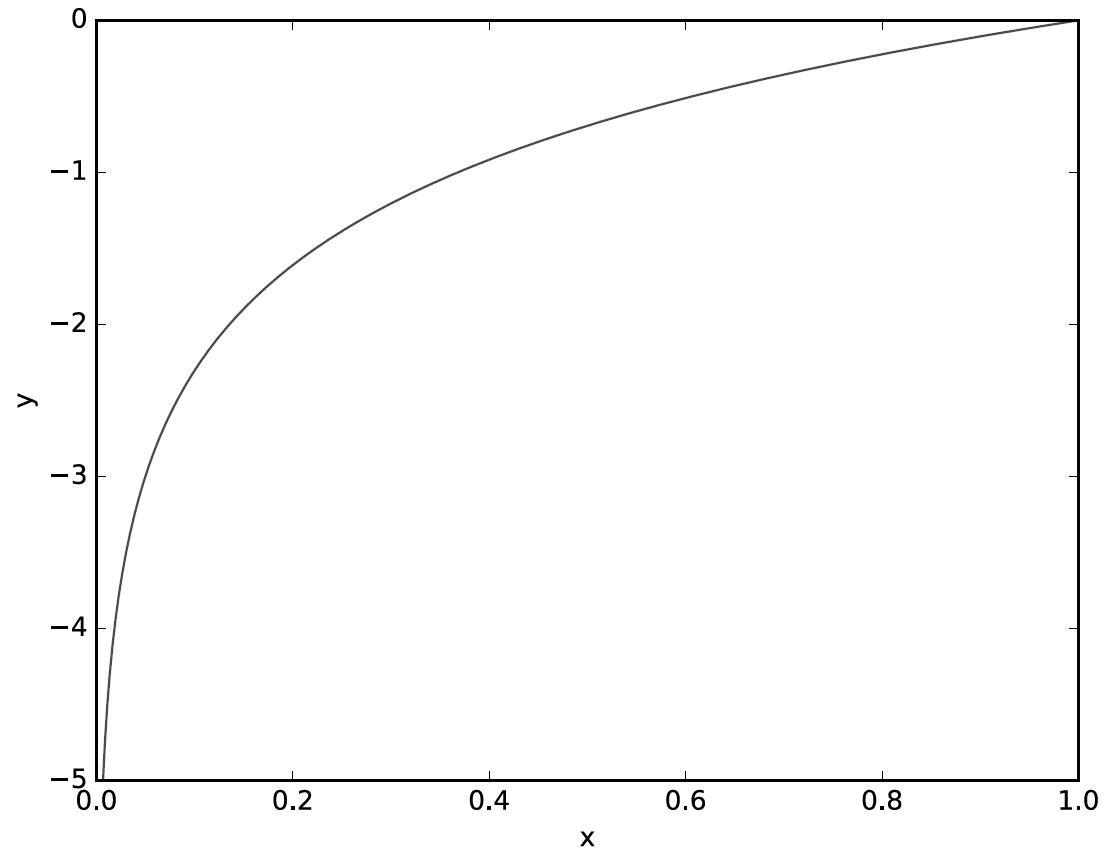

In [5]:
def cross_entropy_error(y, t):
  delta = 1e-7
  return -np.sum(t*np.log(y+delta))

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

print(cross_entropy_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


### 미니배치 학습
- 교차 엔트로피 오차 식
$$ E = -\frac{1}{N} \displaystyle\sum_{n} \displaystyle\sum_{k}t_{nk} log y_{nk} $$
- 데이터가 N개 라면 ${t_{nk}}$는 n번째 레이블의 k번째 값이다. 마지막에 N으로 나누어 정규화함으로서 '평균 손실 함수'를 구한다.
- 미니배치 훈련: 훈련 데이터로부터 일부만 골라 학습을 수행하는 것을 의미

In [6]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label = True)

print(x_train.shape)
print(t_train.shape)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000, 10)


In [7]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print(np.random.choice(60000, 10))

[44918 33406 44186 15598 20045 43702  7804 40488 38984 35359]


### (배치용) 교차 엔트로피 오차 구현하기
- y는 신경망의 출력, t는 정답 레이블.
- 데이터 하나당 교차 엔트로피 오차를 구할 때 reshape로 데이터 형상 바꿔주고 배치의 크기로 나눠 정규화 해 이미지 1장 당 평균의 교차 엔트로피 오차를 계산한다.
- 정답 레이블이 원-핫 인코딩으로 주어졌을 경우

In [8]:
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(t*np.log(y + 1e-7)) / batch_size

- 숫자 레이블로 주어졌을 경우

In [9]:
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

### 손실 함수를 설정하는 이유
- 정확도라는 지표를 설정하는 경우 가중치 매개변수 값을 조금 바꾼다고 해도 정확도는 그대로이다.
- 정확도가 개선된다하더라도 불연속적인 값으로 바뀌게 된다.
- 손실 함수를 지표로 삼게 되면 매개변수의 값이 조금 변할경우 그에 반응하여 손실 함수의 값도 연속적으로 변화한다.

## 수치 미분
### 미분
- 마라톤의 예에서는 '달린 거리'가 '시간'에 대해서 얼마나 변화했는가를 계산한다.
- 즉 한순간의 변화량을 표시하게 된다.
- 함수의 미분을 나타낸 식
$$ \displaystyle\lim_{h\to\infty}\frac{f(x+h)-f(x)}{h} $$
- 함수를 미분하는 계산을 파이썬으로 표현(수치 미분)

In [10]:
def numerical_diff(f, x):
  h = 1e-50
  return (f(x+h)-f(x)) / h

In [11]:
np.float32(1e-50)

0.0

  - 다음과 같은 연산은 반올림 오차가 발생하게 됨. 작은 값이 생략되어 최종 결과에 오차가 생가는 것을 의미한다.
  - 오차를 줄이기 위해 함수 f의 차분을 구한다. 이 차분은 x를 중심으로 그 전후의 차분을 계산한다는 의미에서 중심 차분 혹은 중앙 차분이라고 한다.

In [12]:
def numerical_diff(f, x):
  h = 1e-4
  return (f(x+h) - f(x-h)) / (2*h)

### 수치 미분의 예
간단한 함수 미분하기
$$ y = 0.01x^2 + 0.1x $$

In [13]:
def function_1(x):
  return 0.01*x**2 + 0.1*x


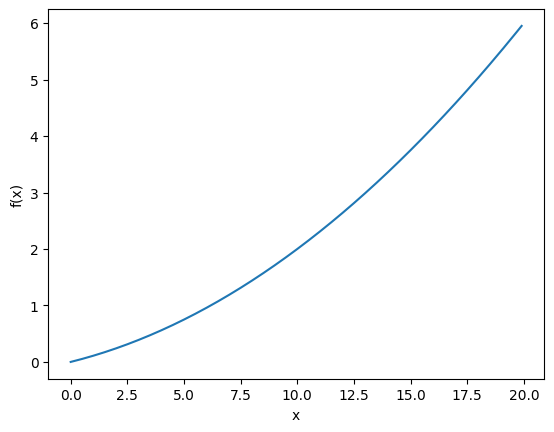

In [14]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [15]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


수치 미분 값을 기울기로 하는 직선

0.1999999999990898


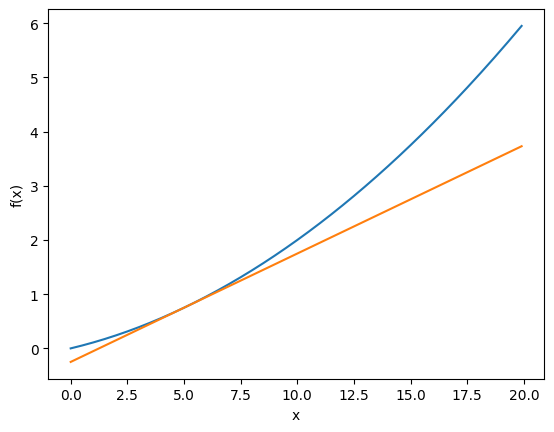

In [16]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

### 편미분
$$ f(x_0, x_1) = x_0 ^ 2 + x_1^2$$

In [17]:
def function_2(x):
  return x[0]**2 + x[1]**2

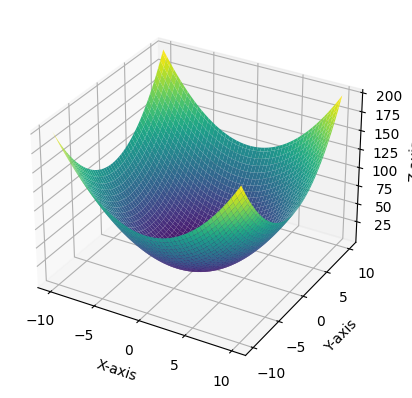

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def function_2(x):
    x = np.array(x)  # 리스트를 넘파이 배열로 변환
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=0)

# 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# x, y 범위 설정
x_range = np.linspace(-10, 10, 100)
y_range = np.linspace(-10, 10, 100)
x, y = np.meshgrid(x_range, y_range)

# z 값 계산
z = function_2([x, y])

# 그래프 그리기
ax.plot_surface(x, y, z, cmap='viridis')

# 라벨 설정
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# 그래프 보이기
plt.show()


- 편미분: 변수가 여럿인 함수에 대한 미분

${x_0=3 x_1=4}$일 때${x_0}$에 대한 편미분

In [23]:
def function_tmp1(x0):
  return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

${x_0=3 x_1=4}$일 때${x_1}$에 대한 편미분

In [24]:
def function_tmp2(x1):
  return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119